In [1]:
from scipy.integrate import odeint
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

# Zadanie 1
Zrobione


# Zadanie 2


|1+hk|<1
Dla h = 0.5 i k = -5 nie jest spełnione, więc explicit euler method nie zadziała.
|1/(1-hk)|<1 jest spełnione, więc implicit euler method jest stabilne 


In [2]:
def fval(y,t):
    return -5*y

def real_fval(x):
    return np.e**(-5*x)

     
def euler_exp(y0, x0, t, h, end, f):
    iters = int((end - x0)//h)+1
    sol = np.empty(shape=iters)
    xs = np.empty(shape=iters)
    y = y0
    sol[0] = y
    xs[0] = x0
    for i in range(1,iters):
        y = y + h * f(y, t)
        x0 = x0 + h
        sol[i] = y
        xs[i] = x0
    return sol, xs


def euler_imp_fval(y0, x0, h, end):
    iters = int((end - x0)//h)+1
    sol = np.empty(shape=iters)
    xs = np.empty(shape=iters)
    y = y0
    sol[0] = y
    xs[0] = x0
    for i in range(1,iters):
        y = y/(1+5*h)
        x0 = x0 + h
        sol[i] = y
        xs[i] = x0
    return sol, xs

In [3]:
# c
rval = real_fval(0.5) 
y,x = euler_exp(1,0,0,0.5,0.5,fval)
calc_val = np.interp(0.5,x,y)
err = abs((rval-calc_val)/rval)
print(err)
print(rval)
print(calc_val)

# d

y,x = euler_imp_fval(1,0,0.5,0.5)
calc_val = np.interp(0.5,x,y)
err = abs((rval-calc_val)/rval)
print(err)
print(rval)
print(calc_val)

19.27374094105521
0.0820849986238988
-1.5
2.4807125602009923
0.0820849986238988
0.2857142857142857


# Zadanie 3

In [4]:
# x1,x2,y1,y2 are previous values.
def ode_vals(x1,x2,y1,y2):
    mat = np.empty(shape=4)
    tmp = (x1**2+y1**2)**(3/2)
    mat[0] = x2
    mat[1] = -x1/tmp
    mat[2] = y2
    mat[3] = -y1/tmp
    return mat

def euler_exp_mat(x1, x2, y1, y2, h, end, endx=True):
    if endx:
        iters = int((end - x1)//h)+1
    else:
        iters = int((end - y1)//h)+1
    t = 0
    sol = np.empty(shape=iters,dtype='object')
    sol[0] = (x1,x2,y1,y2,t)
    for i in range(1,iters):
        nval = ode_vals(x1,x2,y1,y2)
        x1 = x1 + h * nval[0]
        x2 = x2 + h * nval[1]
        y1 = y1 + h * nval[2]
        y2 = y2 + h * nval[3]
        t = t + h
        sol[i] = (x1,x2,y1,y2,t)
    return sol

[(1, 0, 0, 1.0, 0) (1.0, -1e-05, 1e-05, 1.0, 1e-05)
 (0.9999999999, -1.99999999985e-05, 2e-05, 0.9999999999, 2e-05) ...
 (-0.7567933950990176, 0.6539541590937368, -0.6545556362615472, -0.7561382188020894, 28.999969999071297)
 (-0.7567868555574266, 0.6539617136598287, -0.6545631976437353, -0.7561316848076769, 28.999979999071297)
 (-0.75678031594029, 0.6539692681606337, -0.6545707589605834, -0.7561251507377903, 28.999989999071296)]


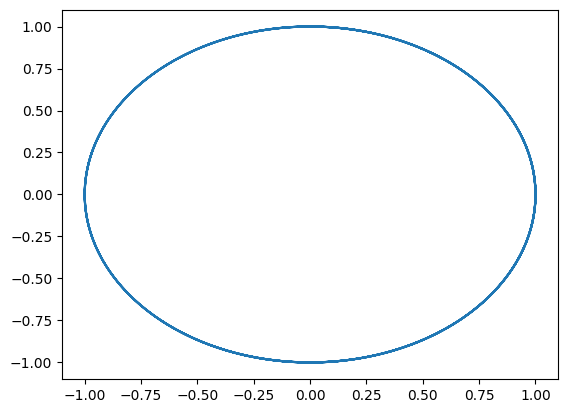

In [5]:
def x_e(e):
    return 1-e
def y_e(e):
    return ((1+e)/(1-e))**2
sol = euler_exp_mat(x_e(0),0,0,y_e(0),0.00001,30)
print(sol)
y,x,t,v,r = [i[0] for i in sol],[i[2] for i in sol],[i[4] for i in sol],[(i[1]**2+i[3]**2)**(1/2) for i in sol],[(i[0]**2+i[2]**2)**(1/2) for i in sol]
plt.plot(x,y)

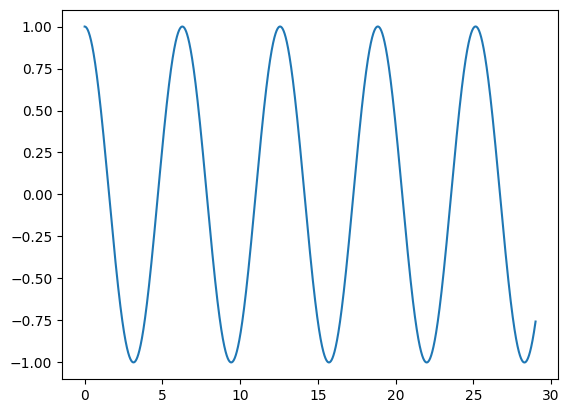

In [6]:
plt.plot(t,y)

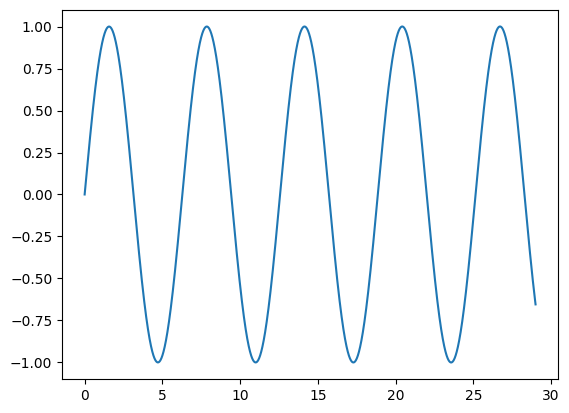

In [7]:
plt.plot(t,x)

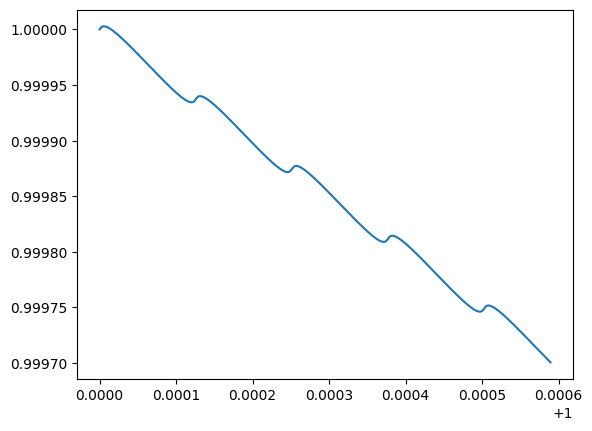

In [11]:
plt.plot(r,v)
print(r)

In [9]:
def x1_or_y1(xy,h):
    def t(x,h,prev):
        return x-prev-h*x
    return fsolve(t,xy,args=(h,xy))

def x2_or_y2(xy,tk,h):
    def t(x,h,prev,tk):
        tmp = -x/((x**2+tk**2)**3/2)
        return x-prev-h*tmp
    return fsolve(t,xy,args=(h,xy,tk))

def euler_imp_mat(x1, x2, y1, y2, h, end, endx=True):
    if endx:
        iters = int((end - x1)//h)+1
    else:
        iters = int((end - y1)//h)+1
    sol = np.empty(shape=iters,dtype='object')
    sol[0] = (x1,x2,y1,y2)
    for i in range(1,iters):
        x1 = x1_or_y1(x1,h)[0]
        x2 = x2_or_y2(x2,x1,h)[0]
        y1 = x1_or_y1(y1,h)[0]
        y2 = x2_or_y2(y2,y1,h)[0]
        sol[i] = (x1,x2,y1,y2)
    return sol

In [10]:
sol = euler_imp_mat(1,0,0,1,0.1,5)
y,x = [i[0] for i in sol],[i[4] for i in sol]
plt.plot(x,y)
print(sol)

/home/kmp/programowanie/MOWNIT/.venv/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


IndexError: tuple index out of range